In [39]:
import pandas as pd
import seaborn as sns
from statsmodels.stats import proportion as pr
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from numpy.random import default_rng


warnings.filterwarnings ("ignore")
pd.set_option ('display.float_format', lambda x: '%.6f' % x)
pd.set_option ('display.width', None)
pd.set_option ('display.max_columns', None)

In [40]:
# Loading Dataset Control and Test
df_control = pd.read_excel("ab_testingHM1.xlsx", sheet_name= "Control Group")
df_test = pd.read_excel("ab_testingHM1.xlsx", sheet_name="Test Group")

In [41]:
df_control.head()
df_test.head()

,Impression,Click,Purchase,Earning
0,92432,6699,1397,14328
1,109816,3721,662,10807
2,92620,4585,962,11148
3,123104,5402,1023,10515
4,121473,6587,926,9573


,Impression,Click,Purchase,Earning
0,138120,3153,1439,11834
1,154992,3562,1710,17867
2,123978,2996,867,15409
3,133912,4557,879,13914
4,166845,5097,1538,16970


In [72]:
df_control.sample(5, random_state=10).index
df_test.sample(5, random_state=5).index

Int64Index([23, 24, 2, 7, 5], dtype='int64')

Int64Index([31, 22, 3, 18, 20], dtype='int64')

In [73]:
df_control = df_control.drop(df_control.sample(5, random_state=10).index,axis=0).reset_index(drop=True)
df_test = df_test.drop(df_test.sample(5, random_state=5).index,axis=0).reset_index(drop=True)

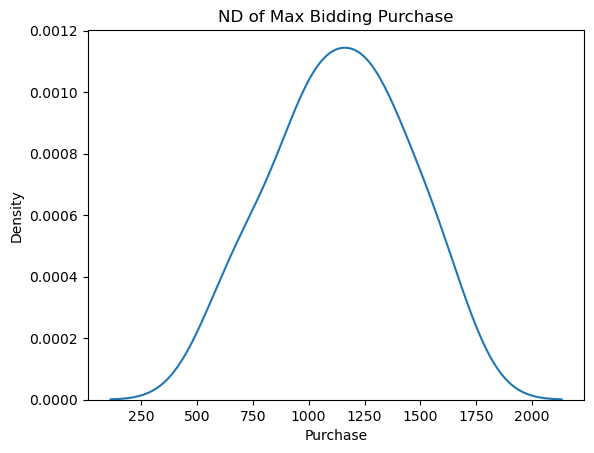

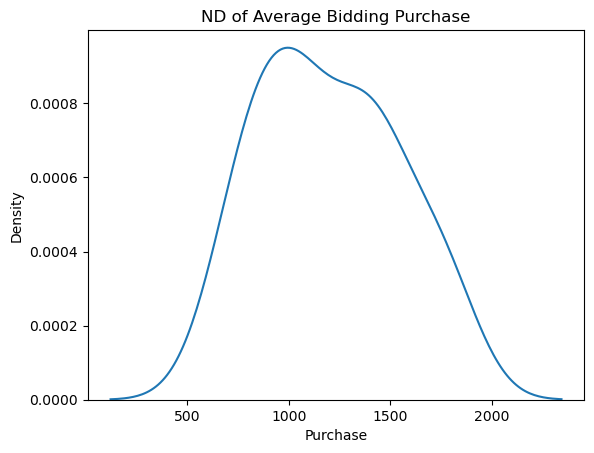

In [74]:
# Normal Distrubution Graph
sns.distplot(df_control["Purchase"], hist=False).set(title="ND of Max Bidding Purchase")
plt.show();

sns.distplot(df_test["Purchase"], hist=False).set(title="ND of Average Bidding Purchase")
plt.show();

In [75]:
# Create New features
df_control["Earning_Per_Click"] = df_control["Earning"] / df_control["Click"]
df_test["Earning_Per_Click"] = df_test["Earning"] / df_test["Click"]

In [76]:
df_control.head()
df_test.head()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,92432,6699,1397,14328,2.138827
1,109816,3721,662,10807,2.904327
2,121473,6587,926,9573,1.453317
3,87107,4908,1092,12908,2.629992
4,119447,4794,1569,12183,2.541302


,Impression,Click,Purchase,Earning,Earning_Per_Click
0,138120,3153,1439,11834,3.753251
1,154992,3562,1710,17867,5.016002
2,123978,2996,867,15409,5.143191
3,133311,4130,1595,13158,3.185956
4,122033,3213,1009,15616,4.860255


# Confidence Interval Evaluation

In [77]:
# Two group comperes to Purchase and Earning
df_purchase = pd.DataFrame({"Control_Purchase": df_control["Purchase"].describe(),
                                "Test_Purchase": df_test["Purchase"].describe()})

df_earning = pd.DataFrame({"Control_Earning": df_control["Earning"].describe(),
                           "Test_Earning": df_test["Earning"].describe()})

In [78]:
df_purchase

,Control_Purchase,Test_Purchase
count,30.000000,30.000000
mean,1141.966667,1199.966667
std,294.515088,339.284997
min,561.000000,640.000000
25%,986.000000,895.250000
50%,1140.500000,1130.000000
75%,1316.250000,1432.250000
max,1684.000000,1825.000000


In [80]:
# Statistic according to Purchase
# Calculate Confidence Interval
sms.DescrStatsW(df_control["Purchase"]).tconfint_mean()
# Mean Control Purchase 1141 is my %95 confidence interval point 
# This value is within the confidence interval

sms.DescrStatsW(df_test["Purchase"]).tconfint_mean()
# Mean Test Purchase 1199 is my %95 confidence interval point

# as a result, two values are within confidence interval so 1199 > 1141

(1031.992925615873, 1251.9404077174604)

(1073.2755666735497, 1326.6577666597836)

In [81]:
df_earning

,Control_Earning,Test_Earning
count,30.000000,30.000000
mean,11986.966667,15320.800000
std,1992.681549,1869.940372
min,7775.000000,11834.000000
25%,10865.750000,13787.500000
50%,12344.000000,15588.500000
75%,13243.250000,16805.500000
max,15481.000000,19343.000000


In [83]:
# Statistic according to Earning
sms.DescrStatsW(df_control["Earning"]).tconfint_mean()
# Mean Control Earning 11986 is my %95 confidence interval point

sms.DescrStatsW(df_test["Earning"]).tconfint_mean()
#  Mean Control Earning 15320 is my %95 confidence interval point

# as a result, two values are within confidence interval so 15320 > 11986

(11242.887147501819, 12731.046185831516)

(14622.55278989641, 16019.047210103588)

# Checking Normal Distrubution 
 - Does the data fit a normal distribution? SHAPIRO TEST
 - Number of Observation is grater than 30
 - Levene Test

# Hypothesis Test
 - H0: There is no statistically significant difference between the theoretical normal distribution and the sample normal distribution.
 - H1: There is statistically significant difference between the theoretical normal distribution and the sample normal distribution.

In [84]:
from scipy.stats import shapiro # for hypothesis

In [85]:
p_value_th = 0.05

In [86]:
df_control.columns

Index(['Impression', 'Click', 'Purchase', 'Earning', 'Earning_Per_Click'], dtype='object')

In [87]:
ttest, p_value = shapiro(df_control["Impression"])
p_value

0.34262388944625854

In [88]:
if p_value >= p_value_th:
    print("Normal")
else:
    print("Abnormal")

Normal


# Automation distrubution

In [89]:
def normality_func(dataframe):
    from scipy.stats import shapiro
    p_value_threshold = 0.05
    p_value_list = []
    distribution_list = []
    normal_list = []
    abnormal_list = []
    for col in dataframe.columns:
        ttest, p_value = shapiro (dataframe[col])
        p_value_list.append (p_value)
        if p_value >= p_value_threshold:
            distribution_list.append ("Normal")
            normal_list.append (col)
        else:
            distribution_list.append ("Abnormal")
            abnormal_list.append (col)

    new_df = pd.DataFrame (index=dataframe.columns, data={"P_Value": p_value_list, "Distribution": distribution_list})
    return new_df, normal_list, abnormal_list

In [90]:
control_normality, control_normal_list, control_abnormal_list = normality_func(df_control)
test_normality, test_normal_list, test_abnormal_list = normality_func(df_test)

In [91]:
control_normality

,P_Value,Distribution
Impression,0.342624,Normal
Click,0.889053,Normal
Purchase,0.768883,Normal
Earning,0.240185,Normal
Earning_Per_Click,0.022952,Abnormal


In [92]:
test_normality

,P_Value,Distribution
Impression,0.435617,Normal
Click,0.520168,Normal
Purchase,0.244450,Normal
Earning,0.731062,Normal
Earning_Per_Click,0.630384,Normal


In [93]:
# Cotrol of Variance Homogeneity
from scipy.stats import levene 
ttest_lev, p_value_lev = levene(df_control["Purchase"], df_test["Purchase"])
print ("ttest: {}\np_value: {}".format (ttest_lev, p_value_lev))
# if p_value is less than 0.05, H0 rejected
# Since the p_value is greater than 0.05, we can not reject H0 hypothesis.
# The difference between the variance distributions of the two groups is not statistically significant

ttest: 1.0643298839216644
p_value: 0.30651257916781127


# Automation variance

In [94]:
def variance_homogeneity(dataframe_control, dataframe_test):
    from scipy.stats import levene
    p_value_threshold = 0.05
    p_value_list = []
    variance_list = []
    column_list = list (zip (sorted (dataframe_control.columns), sorted (dataframe_test.columns)))
    features = []
    homogeneus_list = []
    not_homogeneus_list = []
    for col in column_list:
        ttest_lev, p_value_lev = levene (dataframe_control[col[0]], dataframe_test[col[1]])
        if (col[0] == col[1]) and (p_value_lev >= p_value_threshold):
            p_value_list.append (p_value_lev)
            variance_list.append ("No Difference")
            homogeneus_list.append (col[0])
            features.append (col[0])
        elif (col[0] == col[1]) and (p_value_lev < p_value_threshold):
            p_value_list.append (p_value_lev)
            variance_list.append ("Different")
            not_homogeneus_list.append (col[0])
            features.append (col[0])

    new_df = pd.DataFrame (index=features, data={"P_Value": p_value_list, "Homogeneity_of_Variance": variance_list})

    return new_df, homogeneus_list, not_homogeneus_list

In [95]:
variance_df, homogeneus, not_homogeneus = variance_homogeneity(df_control, df_test)

In [96]:
# Clisk p_value is less than 0.05
# contol ve test gruplarındaki click değişkeni arasında istatisksel olarak bir fark vardır.
# Yani click değişkenin bu farkı bize contol ve test grubununda bir fark olduğunu bize ispatlamıştır
variance_df

,P_Value,Homogeneity_of_Variance
Click,0.001094,Different
Earning,0.862015,No Difference
Earning_Per_Click,0.880538,No Difference
Impression,0.818469,No Difference
Purchase,0.306513,No Difference


In [97]:
# BAĞIMSIZ İKİ ÖRNEKLEM T TESTİ
# Normallik ve Varyans Homojenliği varsayımları sağlanmıştı.
# H0: Kontrol grubu purchase değişkeni ortalaması ile test grubu purchase değişkeni ortalaması arasında istatistiksel olarak anlamlı bir farklılık yoktur.
# H1: Kontrol grubu purchase değişkeni ortalaması ile test grubu purchase değişkeni ortalaması arasında istatistiksel olarak anlamlı bir farklılık vardır.
# p_value < 0.05 ise H0 reddedilir.

from scipy.stats import ttest_ind, mannwhitneyu

# Normal dağılan parametrik değişkenler için ttest, normal dağılmayan nonparametrik değişkenler için mannwhitneyu testini kullanıyoruz.
feat_dict = {}

for feat in control_normal_list:
    if feat in homogeneus:
        ttest_value, p_value = ttest_ind (df_control[feat], df_test[feat], equal_var=True)
        feat_dict[feat] = p_value
    elif feat not in homogeneus:
        ttest_value, p_value = ttest_ind (df_test[feat], df_test[feat], equal_var=False)
        feat_dict[feat] = p_value

for feat in control_abnormal_list:
    ttest_value, p_value = mannwhitneyu (df_test[feat], df_test[feat])
    feat_dict[feat] = p_value

ttest_df = pd.DataFrame (data=feat_dict.values (), index=feat_dict.keys (), columns=["Ttest_P_Value"])

In [98]:
ttest_df

,Ttest_P_Value
Impression,0.000015
Click,1.000000
Purchase,0.482346
Earning,0.000000
Earning_Per_Click,1.000000


In [99]:
# Maximum ve Average Bidding ortalamalarını karşılaştırmak için dataframe'e ekliyoruz.
for col in df_control.columns:
    ttest_df.loc[ttest_df.index == col, "Maximum Bidding Mean"] = df_control[col].mean()


for col in df_test.columns:
    ttest_df.loc[ttest_df.index == col, "Average Bidding Mean"] = df_test[col].mean ()

In [100]:
ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean
Impression,0.000015,110045.233333,138441.333333
Click,1.000000,5712.266667,4018.933333
Purchase,0.482346,1141.966667,1199.966667
Earning,0.000000,11986.966667,15320.800000
Earning_Per_Click,1.000000,2.313508,3.947304


# Hypothesis H0 Status

In [101]:
th = 0.05
ttest_df.loc[ttest_df["Ttest_P_Value"] < th, "H0_Hypothesis"] = "Rejected"
ttest_df.loc[ttest_df["Ttest_P_Value"] >= th, "H0_Hypothesis"] = "Not Rejected"

In [102]:
ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean,H0_Hypothesis
Impression,0.000015,110045.233333,138441.333333,Rejected
Click,1.000000,5712.266667,4018.933333,Not Rejected
Purchase,0.482346,1141.966667,1199.966667,Not Rejected
Earning,0.000000,11986.966667,15320.800000,Rejected
Earning_Per_Click,1.000000,2.313508,3.947304,Not Rejected


In [103]:

# Her bir değişken için iki bidding tipinin ortalamalarını karşılaştırıyoruz.
ttest_df["Winner"] = ttest_df.apply (
    lambda x: "Maximum Bidding" if (x["Maximum Bidding Mean"] >= x["Average Bidding Mean"]) & (
                x["H0_Hypothesis"] == "Rejected") else
    "Average Bidding" if (x["Maximum Bidding Mean"] < x["Average Bidding Mean"]) & (
                x["H0_Hypothesis"] == "Rejected") else
    "No Difference", axis=1)

ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean,H0_Hypothesis,Winner
Impression,0.000015,110045.233333,138441.333333,Rejected,Average Bidding
Click,1.000000,5712.266667,4018.933333,Not Rejected,No Difference
Purchase,0.482346,1141.966667,1199.966667,Not Rejected,No Difference
Earning,0.000000,11986.966667,15320.800000,Rejected,Average Bidding
Earning_Per_Click,1.000000,2.313508,3.947304,Not Rejected,No Difference


In [ ]:
# sadece Earning kolonunda ve Impression kolonunda hipotez testi reddedildi
# yani average bidding mean yapılırsa eski yöntem(max bidding mean) yöntemine göre
# kazançın daha fazla olduğu istatistiksel olarak ispatlanmış oldu.
# Ek olarak İzlenim kolonunda Average Bidding Mean kullanılırsa diğer yönteme kıyasla artış olduğu görülüyor. 
# İzlenim sayısının bu üstünlüğü istatistiksel olarak ispatlanmış olup. Kazanılan paraya etki ettiğini söylemek mümkün 
# Bundan sonra alınacak reaksiyon İzlenim sayılarını arttırmak olmalıdır. İzlenim sayısı arttıkça kazanılan parada artış olacağı görülmektedir.